In [1]:
""" 히스토그램 그리는 영역"""

import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import savgol_filter

def getGrayHistImage(hist):
    imgHist = np.full((100, 256), 255, dtype=np.uint8)
    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)
    return imgHist


path = 'E:\experiment data/aluminum/2021-01-27/0.05mmsec_125f_epoxy_dic\dic/C001H001S0001-00.cih08.jpg'
src = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

hist = cv2.calcHist([src], [0], None, [256], [0, 256])
histImg = getGrayHistImage(hist)

cv2.imshow('src', src)
cv2.imshow('histImg', histImg)
cv2.waitKey()

cv2.destroyAllWindows()

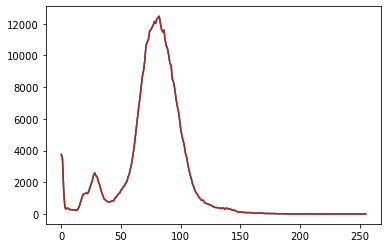

In [2]:
""" color 히스토그램 그리는 영역"""
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2


# 컬러 영상의 히스토그램
# path = r'C:\Users\ghrms\Desktop\ddd\aaa.jpg'
src = cv2.imread(path, cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed!')
    sys.exit()

colors = ['b', 'g', 'r']
bgr_planes = cv2.split(src)

for (p, c) in zip(bgr_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color=c, alpha= 0.7)

cv2.imshow('src', src)
cv2.waitKey(1)

plt.show()

cv2.destroyAllWindows()

In [3]:
b_plane, g_plane, r_plane = cv2.split(src)
cv2.namedWindow('G_plane',cv2.WINDOW_NORMAL)
cv2.imshow('G_plane',g_plane)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
""" 히스토그램트랙바 HSV 칼라"""

import sys
import numpy as np
import cv2

# path = r'C:\Users\ghrms\Desktop\ddd\KakaoTalk_20210202_143220877.jpg'

src = cv2.imread(path)

if src is None:
    print('Image load failed!')
    sys.exit()

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

def on_trackbar(pos):
    hmin = cv2.getTrackbarPos('H_min', 'dst')
    hmax = cv2.getTrackbarPos('H_max', 'dst')
    smin = cv2.getTrackbarPos('S_min', 'dst')
    smax = cv2.getTrackbarPos('S_max', 'dst')
    vmin = cv2.getTrackbarPos('V_min', 'dst')
    vmax = cv2.getTrackbarPos('V_max', 'dst')

    dst = cv2.inRange(src_hsv, (hmin, smin, vmin), (hmax, smax, vmax))
    cv2.imshow('dst', dst)

cv2.namedWindow('src', cv2.WINDOW_NORMAL)
cv2.resizeWindow('src', 1920, 1080)
cv2.imshow('src', src)
cv2.namedWindow('dst', cv2.WINDOW_NORMAL)
cv2.resizeWindow('dst', 1920, 1080)
cv2.createTrackbar('H_min', 'dst', 50, 179, on_trackbar)
cv2.createTrackbar('H_max', 'dst', 80, 179, on_trackbar)
cv2.createTrackbar('S_min', 'dst', 150, 255, on_trackbar)
cv2.createTrackbar('S_max', 'dst', 255, 255, on_trackbar)
cv2.createTrackbar('V_min', 'dst', 0, 255, on_trackbar)
cv2.createTrackbar('V_max', 'dst', 255, 255, on_trackbar)
on_trackbar(0)

cv2.waitKey()

cv2.destroyAllWindows()

In [6]:
""" 히스토그램트랙바 RGB 칼라"""

import sys
import numpy as np
import cv2

# path = r'C:\Users\ghrms\Desktop\ddd\KakaoTalk_20210202_143220877.jpg'
src = cv2.imread(path)


if src is None:
    print('Image load failed!')
    sys.exit()

def on_trackbar(pos):
    rmin = cv2.getTrackbarPos('R_min', 'dst')
    rmax = cv2.getTrackbarPos('R_max', 'dst')
    gmin = cv2.getTrackbarPos('G_min', 'dst')
    gmax = cv2.getTrackbarPos('G_max', 'dst')
    bmin = cv2.getTrackbarPos('B_min', 'dst')
    bmax = cv2.getTrackbarPos('B_max', 'dst')

    dst = cv2.inRange(src, (rmin, gmin, bmin), (rmax, gmax, bmax))
    cv2.imshow('dst', dst)

cv2.namedWindow('src', cv2.WINDOW_NORMAL)
cv2.resizeWindow('src', 1920, 1080)
cv2.imshow('src', src)
cv2.namedWindow('dst', cv2.WINDOW_NORMAL)
cv2.resizeWindow('dst', 1920, 1080)
cv2.createTrackbar('R_min', 'dst', 0, 100, on_trackbar)
cv2.createTrackbar('R_max', 'dst', 100, 255, on_trackbar)
cv2.createTrackbar('G_min', 'dst', 128, 255, on_trackbar)
cv2.createTrackbar('G_max', 'dst', 255, 255, on_trackbar)
cv2.createTrackbar('B_min', 'dst', 0, 255, on_trackbar)
cv2.createTrackbar('B_max', 'dst', 100, 255, on_trackbar)
on_trackbar(0)

cv2.waitKey()

cv2.destroyAllWindows()


In [1]:
"""Threshold  이용하여 영역 확인"""

import cv2
src = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def on_threshhold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)

cv2.imshow('src',src)
cv2.namedWindow('dst')
cv2.createTrackbar('Treshold', 'dst', 0, 255, on_threshhold)
cv2.setTrackbarPos('Treshold', 'dst', 125)

cv2.waitKey()
cv2.destroyAllWindows()

NameError: name 'path' is not defined

In [11]:
""" 배경 음영처리 """
import sys
import numpy as np
import cv2


src = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# src= g_plane

if src is None:
    print('Image load failed!')
    sys.exit()


def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0:
        bsize = bsize - 1
    if bsize < 3:
        bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)


cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()
cv2.destroyAllWindows()


In [15]:
import cv2
import sys
import numpy as np
path = 'E:\experiment data/aluminum/2021-01-27/0.05mmsec_125f_epoxy_dic\dic/C001H001S0001-00.cih01.jpg'
path_8 = 'E:\experiment data/aluminum/2021-01-27/0.05mmsec_125f_epoxy_dic\dic/C001H001S0001-00.cih08.jpg'
src_0 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
src_8 = cv2.imread(path_8, cv2.IMREAD_GRAYSCALE)

if src_8 is None:
    if src_0 is None:
        print('Image load failed!')
        sys.exit()

cur_img = cv2.adaptiveThreshold(src_0, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 5)

cv2.imshow('src_0', src_0)
cv2.imshow('cur_img', cur_img)
cv2.waitKey()
cv2.destroyAllWindows()

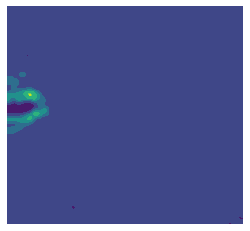

In [81]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import sys
import glob

aa_path = r'E:\experiment data\aluminum\2021-03-25\faruv\ROI_ML_STRESS/'
path = r'E:\experiment data\aluminum\2021-03-25\faruv\img/ff002812.jpg'
path_cur = r'E:\experiment data\aluminum\2021-03-25\faruv\img/ff000573.jpg'
# path_8 = r'E:\experiment data\aluminum\2021-01-27\0.05mmsec_125f_epoxy_dic\img/ff3396.jpg'

src = cv2.imread(path, cv2.IMREAD_GRAYSCALE)[166:506,336:705]
src_2 = cv2.imread(path_cur, cv2.IMREAD_GRAYSCALE)[166:506,336:705]
dst = cv2.absdiff(src,src_2)

gas = cv2.GaussianBlur(dst,(0,0),3)
plt.imshow(src_2, cmap='gray')
# cs = plt.contour(gas, [k for k in range(2,int(np.max(gas)))],  colors='black', linewidths = 0.5)
plt.axis('off')
cs = plt.contourf(gas)
plt.savefig(aa_path+'2812_573.png', dpi=500)
# print(src)

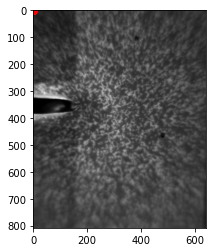

In [25]:
from fracture import Plastic_zone
import cv2
import sys
import matplotlib.pyplot as plt

PZ = Plastic_zone(79, 535)
PZ.von_mises()[1]

src = cv2.imread(r'G:\analysis\DIC/ff3301.jpg', cv2.IMREAD_GRAYSCALE)
if src is None:
    if src_0 is None:
        print('Image load failed!')
        sys.exit()

cv2.flip(src,1,src)

plt.imshow(src, cmap='gray')

In [ ]:
import DIC.DIC as dic
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def on_threshhold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)

path = r'E:\experiment data\aluminum\2021-03-25\faruv_tension_2\gap1000'
num = 1

image = dic.load_file(path)
cur = list(image.keys())[num]
src = image[cur][:,:,1][293:754,71:149]


cv2.imshow('src',src)
cv2.namedWindow('dst')
cv2.createTrackbar('Treshold', 'dst', 0, 255, on_threshhold)
cv2.setTrackbarPos('Treshold', 'dst', 125)

cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
import pickle
import pandas as pd

i=1
pd.read_pickle('../data/{}.pkl'.format(i))

[str(v)+str('_num') for v in range(10)]

['0_num',
 '1_num',
 '2_num',
 '3_num',
 '4_num',
 '5_num',
 '6_num',
 '7_num',
 '8_num',
 '9_num']